## **GRIP - TSF | Data Science & Business Analytics Internship**
### **Task 1 : Simple Linear Regression**
### Author : AYOUB EL AAMRI.

In [49]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [50]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


## **Exploratory Data Analysis**

In [51]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [52]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [53]:
print('Shape of the Dataset : ',data.shape)
print ('Columns names : ',data.columns)
print ('Columns Datatype : ', data.dtypes)

Shape of the Dataset :  (25, 2)
Columns names :  Index(['Hours', 'Scores'], dtype='object')
Columns Datatype :  Hours     float64
Scores      int64
dtype: object


Hours     0
Scores    0
dtype: int64


<AxesSubplot:>

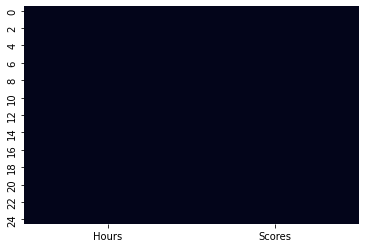

In [54]:
print(data.isnull().sum())
sns.heatmap(data.isnull(), cbar=False)

In [55]:
#percentile of each Predictors
data.quantile([0.01,.05,.10,.15 ,.25,.5,.8,.85,0.9,.95,.99,1])

,Hours,Scores
0.01,1.196,17.72
0.05,1.580,20.20
0.10,2.140,22.20
0.15,2.500,24.60
0.25,2.700,30.00
0.50,4.800,47.00
0.80,7.720,77.00
0.85,8.000,82.60
0.90,8.420,85.60
0.95,8.820,87.60


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

<AxesSubplot:>

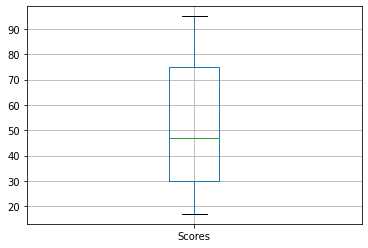

In [56]:
# to check the outliers in the data by plotting the boxplot
data.boxplot(['Scores'])

<AxesSubplot:>

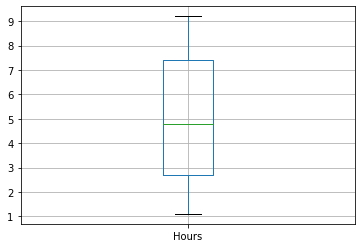

In [57]:
data.boxplot(['Hours'])

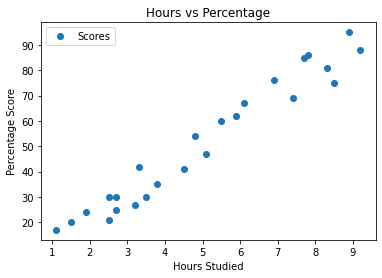

In [58]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

C:\Users\senor\.virtualenvs\TSF_Intern-x_W3z4Vx\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


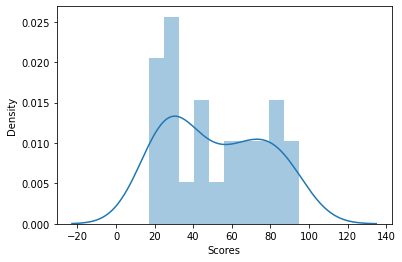

In [59]:
sns.distplot(data['Scores'], bins=10)
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

<AxesSubplot:>

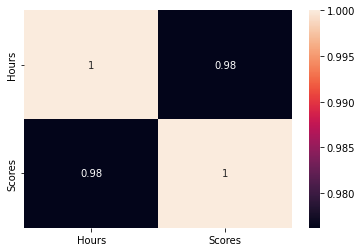

In [60]:
sns.heatmap(data.corr(),annot=True)

Hours and Scores are highly Positively correlated to each other

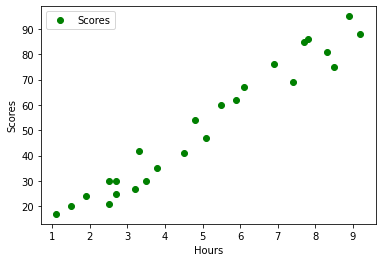

In [61]:
data.plot(x = 'Hours', y = 'Scores', style = 'o',color='green')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## **Preparing Data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [62]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [63]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


## **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [64]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [65]:
print('Training Score : ', regressor.score(X_train, y_train))
print('Test Score : ', regressor.score(X_test, y_test))

Training Score :  0.9515510725211552
Test Score :  0.9454906892105355


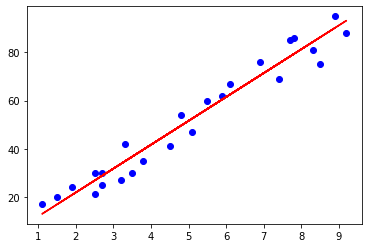

In [66]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, color = 'blue')
plt.plot(X, line, color = 'red')
plt.show()

## **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [67]:
print("Testing Data : ",X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores
print("Prediction : ",y_pred)

Testing Data :  [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
Prediction :  [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [68]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual Score': y_test,'Predicted Score': y_pred, 'Residual':y_test-y_pred })
df 

,Actual Score,Predicted Score,Residual
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


In [69]:
# You can also test with your own data
hours = 9.25
pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


In [70]:
#Using the formula y = mx + c , where m = coeffiecient , c = intercept
y = regressor.coef_*9.25 + regressor.intercept_
print("Predicted Score = ", y[0])


Predicted Score =  93.69173248737535


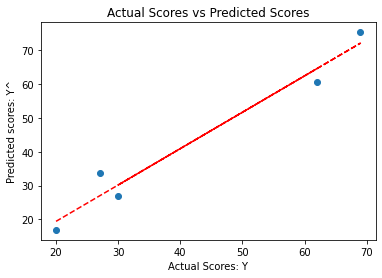

In [71]:
x=y_test
y=y_pred
plt.scatter(x, y)
plt.xlabel("Actual Scores: Y")
plt.ylabel("Predicted scores: Y^")
plt.title("Actual Scores vs Predicted Scores")
# Plotting the Best fit line

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

## **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [72]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Root mean square error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score : ', metrics.r2_score(y_test,y_pred))

from scipy import stats
t_statistic, pvalues =stats.ttest_ind(y_test, y_pred)
print('t-statistic -->',t_statistic)
print('P-value -->',pvalues)


f_statistic, pvalues =stats.f_oneway(y_test, y_pred)
print('f-statistic -->',f_statistic)
print('P-value -->',pvalues)


Mean Absolute Error: 4.183859899002975
Root mean square error :  4.647447612100367
R2 Score :  0.9454906892105355
t-statistic --> -0.07120736344975115
P-value --> 0.9449806673550678
f-statistic --> 0.005070488609464962
P-value --> 0.9449806673550623


## **Summary**

The output of linear regression at 95% confident level have 1 model variable. The model on train dataset have good R2 value suggest the goodness of fit.This is futher tested on the test sample.

In test sample R-square ,T-test, F-test were performed to measure the model performance in terms of goodness of fit & randomness of variance between actual and the predicted values.

In summary ,the model goodness of fit on train sample and performance of model on test sample are in acceptable range. The final model parameters are tabled below